## Importando as bibliotecas necessárias

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import seaborn as sns

## Base de dados
Foi utilizada para o trabalho a base de dados do spotify que contém as informações das 
músicas mais famosas por artistas. As informações presentes na base são as seguintes:
- artist (Nome do artista)
- song (Música do artista)
- duration_ms (Duração em segundos da música)
- explicit (Indica se a letra ou o conteúdo da faixa contém linguagem, temas ou imagens que podem ser considerados ofensivos ou inapropriados)
- year (Ano de lançamento da música)
- popularity (Popularidade da música)
- danceability (O quanto a música é 'dançável')
- energy (O quanto a música é 'energética')
- key (Tom musical da música, representado como um número inteiro de 0 a 11)
- loudness (Volume médio da música, em decibéis (dB))
- mode (Modalidade da música: maior (1) ou menor (0))
- speechiness (Mede a presença de palavras faladas (como podcasts ou rap))
- acousticness (Grau de quanto a música é acústica (0.0 a 1.0))
- instrumentalness (Estima a probabilidade de a faixa ser instrumental (sem vocais))
- liveness (Detecta a presença de público ao vivo)
- valence (Descreve o tom emocional da música (0.0 = triste, 1.0 = alegre))
- tempo (Tempo da música em batidas por minuto (BPM))
- genre (Gênero musical da música)

In [3]:
df = pd.read_csv("datasets_atividades/songs_normalize.csv")
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


## Opção de Rede: Rede de popularidade

- Vértices: artistas
- Arestas: conexões entre artistas que possuem a mesma popularidade

#### Estruturando o dataset para a análise

In [4]:
df['genre_list'] = df['genre'].apply(lambda x: [item.strip() for item in x.split(',')])
df = df.explode('genre_list')

In [5]:
df = df.drop_duplicates(subset=['artist', 'song'])
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,genre_list
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",rock
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",pop
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",rock
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country",hip hop
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,pop


### Estruturando a rede

Filtrando as colunas de interesse do dataset, que, neste caso são as:
- artist
- popularity

In [7]:
df = df[['artist', 'popularity']]
df

,artist,popularity
0,Britney Spears,77
1,blink-182,79
2,Faith Hill,66
3,Bon Jovi,78
4,*NSYNC,65
...,...,...
1995,Jonas Brothers,79
1996,Taylor Swift,78
1997,Blanco Brown,69
1998,Sam Smith,75


### Agrupamento dos gêneros por popularidade

In [8]:
grouped = df.groupby('popularity')

# for artist, p in grouped:
#     print(p[['artist', 'popularity']])  # Mostra apenas colunas desejadas
#     print("-" * 40)

### Criação do grafo

In [9]:
graph = nx.Graph()

for artist, popularity in grouped:
    artists = popularity['artist'].unique()
    for artist1, artist2 in combinations(artists, 2):
        if graph.has_edge(artist1, artist2):
            graph[artist1][artist2]['weight'] += 1
        else:
            graph.add_edge(artist1, artist2, weight=1)

### Calculando a distribuição de graus do grafo

In [15]:
degree_sequence_simple = [d for n, d in graph.degree()]
degree_count_simple = Counter(degree_sequence_simple)

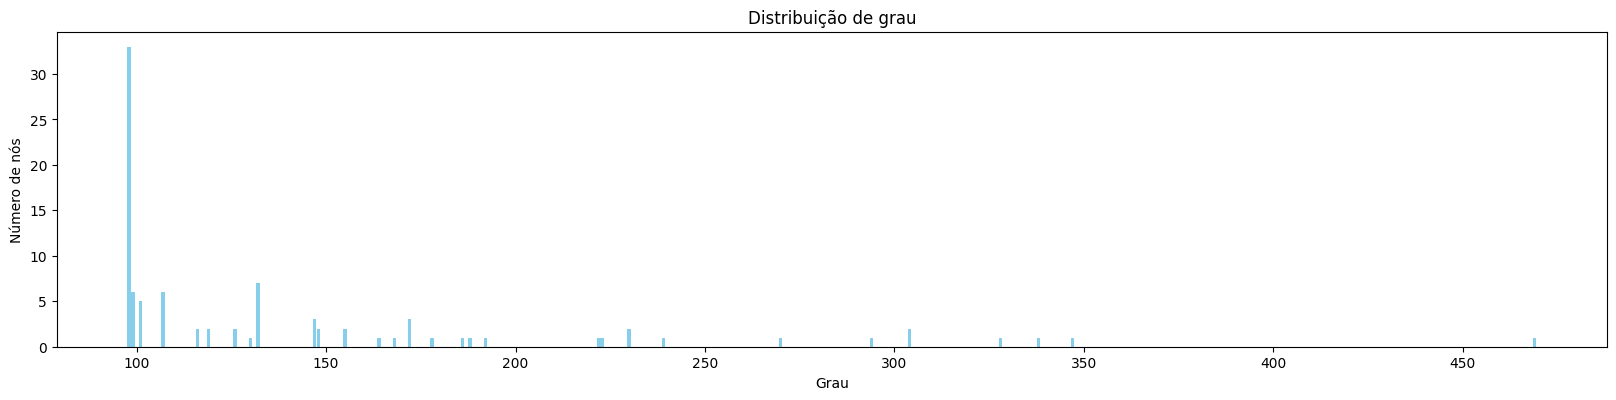

In [17]:
degrees = list(degree_count_simple.keys())[:30]
counts = list(degree_count_simple.values())[:30]

plt.figure(figsize=(20, 5))
plt.bar(degrees, counts, width=0.9, color='skyblue')
plt.xlabel("Grau")
plt.ylabel("Número de nós")
plt.title("Distribuição de grau")

plt.subplots_adjust(bottom=0.25)
plt.show()


### Calculando o número de vértices e arestas do grafo

#### Número de arestas

In [140]:
graph.number_of_edges()

35168

#### Número de nós

In [141]:
graph.number_of_nodes()

833

### Calculando a centralidade dos nós do grafo por grau
- O código abaixo irá calcular a centralidade de grau de todos os nós do Grafo graph e armazenar os resultados em um dicionário, onde as chaves são os identificadores dos nós. 
- Você pode então acessar a centralidade do nó “x” através do dicionário.

#### Centralidade de todos os nós

In [41]:
centrality = nx.degree_centrality(graph)
centralidade_nos = pd.DataFrame(centrality.items(), columns=['artist', 'centrality'])

#### Representação gráfica das centralidades através de um gráfico
- Como a rede conecta artistas que possuem a mesma popularidade, a representação da centralidade por meio de gráficos pode se tornar complicada pois o dataframe possui mais de 800 artistas. Portanto, para facilitar a visualização e o entendimento do gŕafico, optou-se por selecionar apenas 30 vértices (artistas) para visualização das centralidades.

/tmp/ipykernel_7265/1663733925.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top30_centralidade, x='centrality', y='artist', palette='viridis')


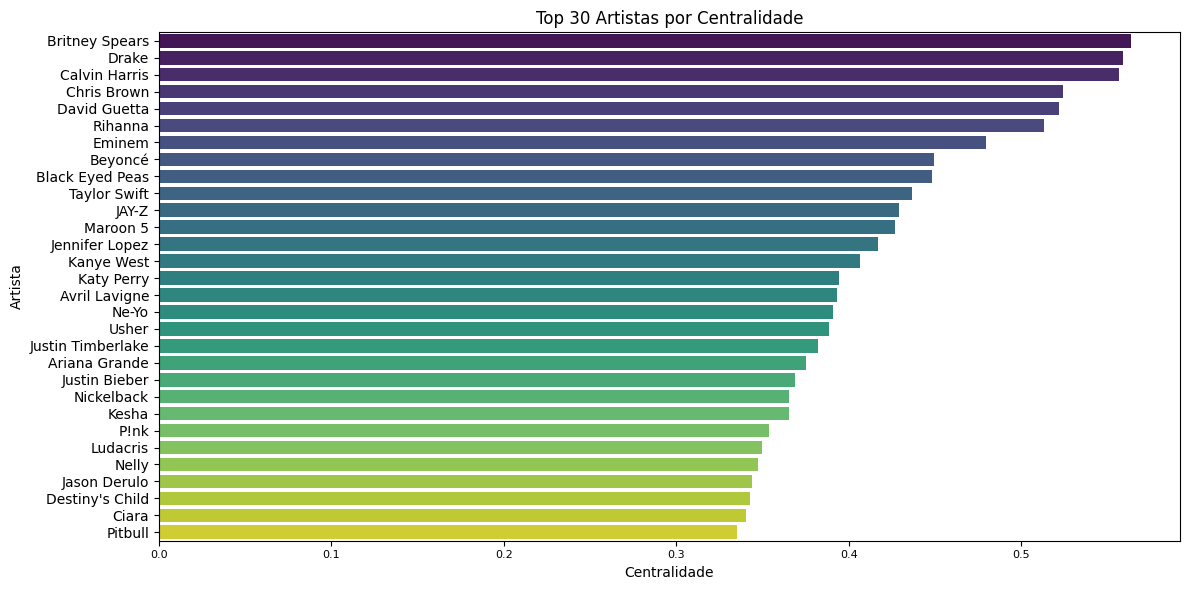

In [42]:
top30_centralidade = centralidade_nos.sort_values(by='centrality', ascending=False).head(30)

plt.figure(figsize=(12, 6))
plt.xticks(rotation=0, fontsize=8)
sns.barplot(data=top30_centralidade, x='centrality', y='artist', palette='viridis')
plt.title('Top 30 Artistas por Centralidade')
plt.xlabel('Centralidade')
plt.ylabel('Artista')
plt.tight_layout()
plt.show()

### Calculando a centralidade dos nós do grafo por eigenvector

- O código abaixo irá calcular a centralidade de grau de todos os nós do Grafo graph e armazenar os resultados em um dicionário, onde as chaves são os identificadores dos nós. 
- Você pode então acessar a centralidade do nó “x” através do dicionário.

In [39]:
centrality_vector = nx.eigenvector_centrality(graph)
centralidade_vector_nos = pd.DataFrame(centrality_vector.items(), columns=['artist', 'centrality_vector'])

#### Representação gráfica das centralidades através de um gráfico
- Como a rede conecta artistas que possuem a mesma popularidade, a representação da centralidade por meio de gráficos pode se tornar complicada pois o dataframe possui mais de 800 artistas. Portanto, para facilitar a visualização e o entendimento do gŕafico, optou-se por selecionar apenas 30 vértices (artistas) para visualização das centralidades.

/tmp/ipykernel_7265/2916967471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top30_centralidade_vector, x='centrality_vector', y='artist', palette='viridis')


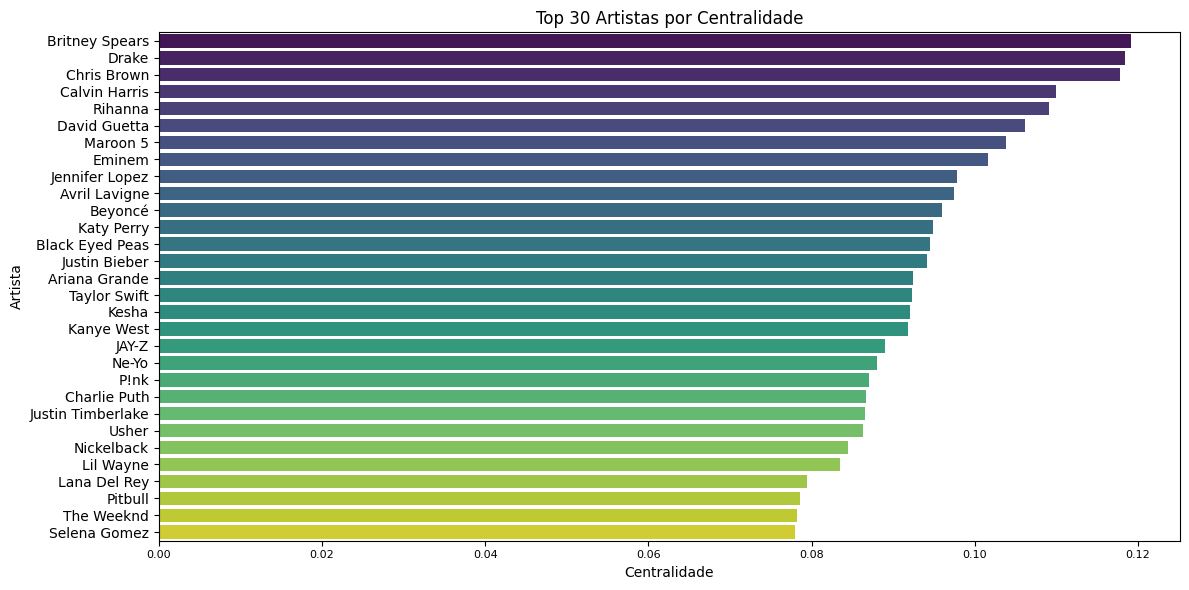

In [40]:
top30_centralidade_vector = centralidade_vector_nos.sort_values(by='centrality_vector', ascending=False).head(30)

plt.figure(figsize=(12, 6))
plt.xticks(rotation=0, fontsize=8)
sns.barplot(data=top30_centralidade_vector, x='centrality_vector', y='artist', palette='viridis')
plt.title('Top 30 Artistas por Centralidade')
plt.xlabel('Centralidade')
plt.ylabel('Artista')
plt.tight_layout()
plt.show()

### Calculando o coeficiente de agrupamento
- O coeficiente de agrupamento mede a propensão dos nós em formar agrupamentos ou comunidades na rede.

#### Coeficiente de agrupamento
- O código abaixo calcula o coeficiente de todos os nós do Grafo graph e armazena os resultados em um dicionário. É possível acessar o coeficiente de agrupamento do nó "x" através do dicionário.

In [94]:
clustering = nx.clustering(graph)
clustering_nos = pd.DataFrame(clustering.items(), columns=['artist', 'clustering'])

#### Representação gráfica dos coeficientes de agrupamentos dos nós

/tmp/ipykernel_7265/1079158035.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top30_clustering, x='clustering', y='artist', palette='viridis')


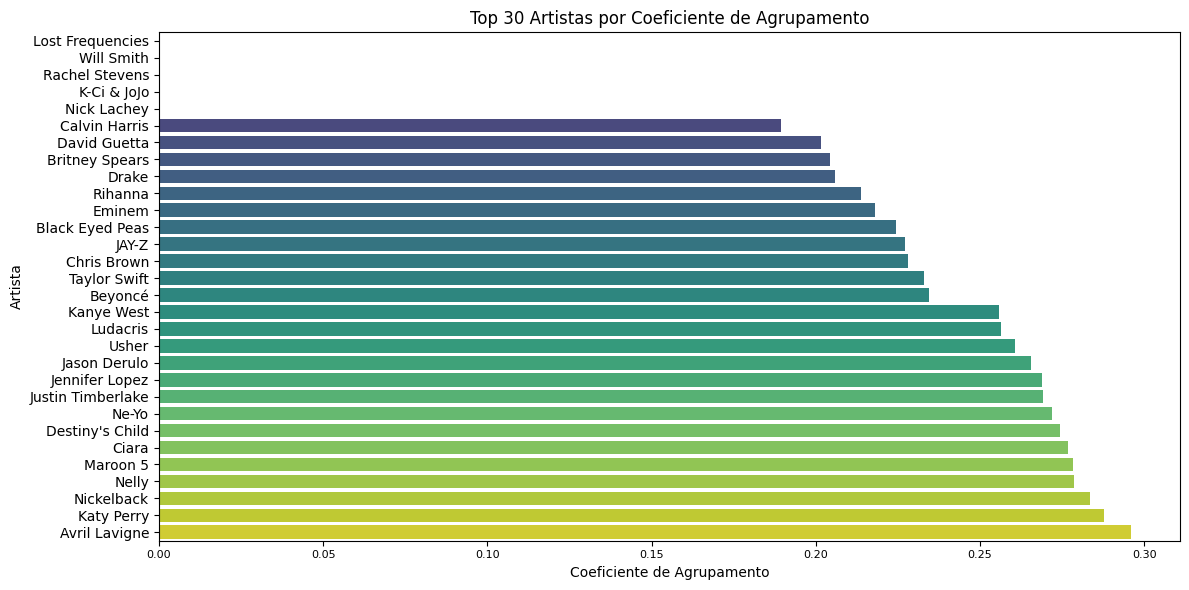

In [95]:
top30_clustering = clustering_nos.sort_values(by='clustering', ascending=True).head(30)

plt.figure(figsize=(12, 6))
plt.xticks(rotation=0, fontsize=8)
sns.barplot(data=top30_clustering, x='clustering', y='artist', palette='viridis')
plt.title('Top 30 Artistas por Coeficiente de Agrupamento')
plt.xlabel('Coeficiente de Agrupamento')
plt.ylabel('Artista')
plt.tight_layout()
plt.show()

## Representação do grafo: Tamanho dos vértices proporcionais às centralidades

In [96]:
for index, row in centralidade_nos.iterrows():
    artist = row['artist']
    centrality = row['centrality']
    if artist in graph.nodes():
        graph.nodes[artist]['centrality'] = centrality
        
for index, row in centralidade_vector_nos.iterrows():
    artist = row['artist']
    centrality_vector = row['centrality_vector']
    if artist in graph.nodes():
        graph.nodes[artist]['centrality_vector'] = centrality_vector 

In [56]:
# for node in graph.nodes():
#     print(f"Node: {node}")
#     print(f"Centrality (degree): {graph.nodes[node].get('centrality', 'Not found')}")
#     print(f"Centrality (eigenvector): {graph.nodes[node].get('centrality_vector', 'Not found')}")
#     print('-' * 50)


#### Representação do grafo utilizando a centralidade por grau

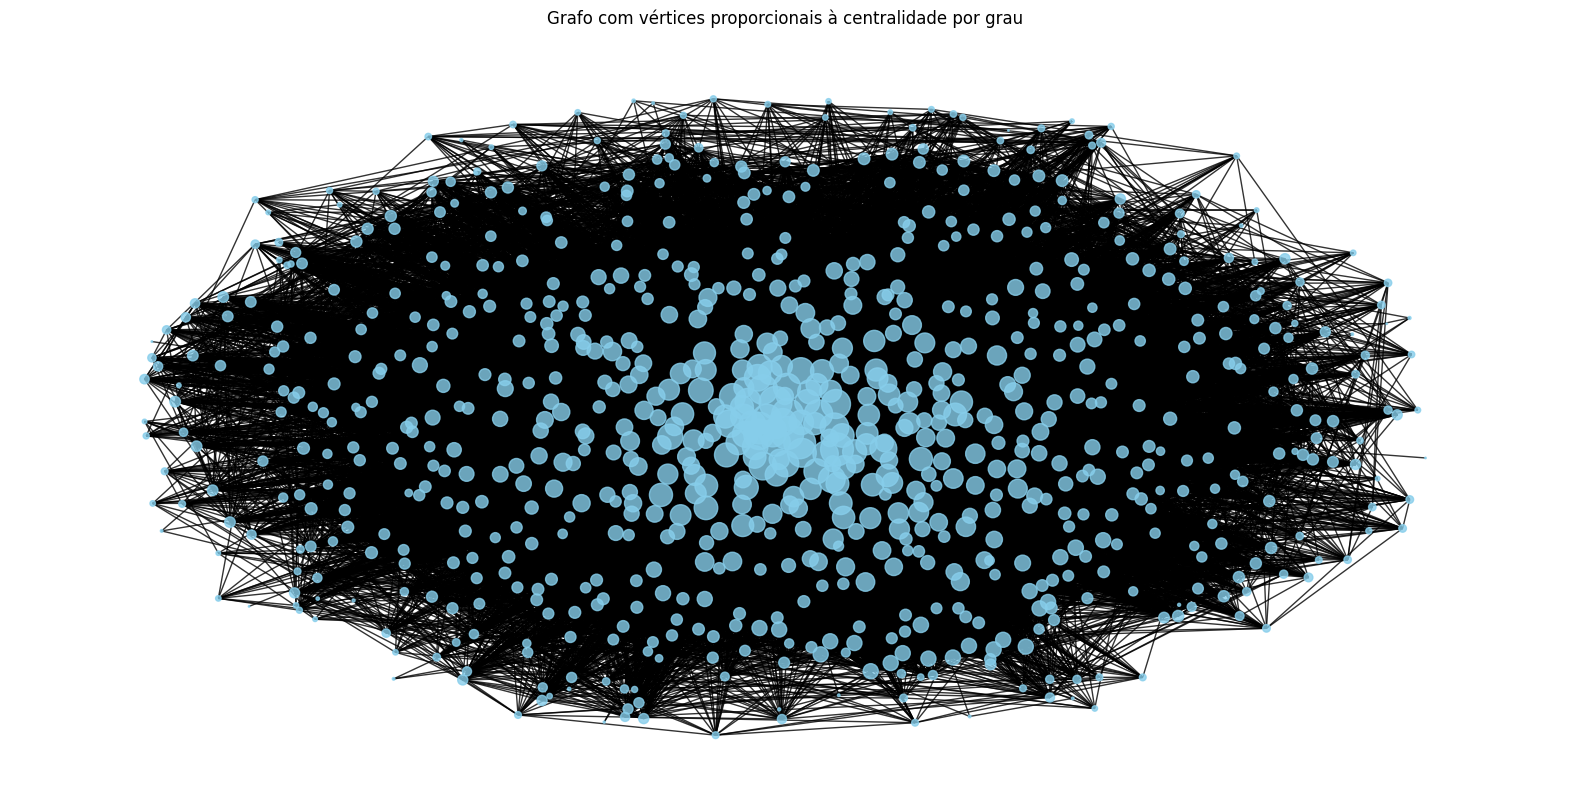

In [80]:
node_sizes_degree = [graph.nodes[node].get('centrality', 0) * 1000 for node in graph.nodes()]

pos = nx.spring_layout(graph, k=1, seed=2)
plt.figure(figsize=(20, 10))
nx.draw_networkx(
    graph,
    pos,
    node_size=node_sizes_degree,
    with_labels=False,
    font_size=10,
    node_color='skyblue',
    edge_color='black',
    alpha=0.8
)
plt.title("Grafo com vértices proporcionais à centralidade por grau")
plt.axis('off')
plt.show()

#### Representação do grafo utilizando a centralidade por eigenvector

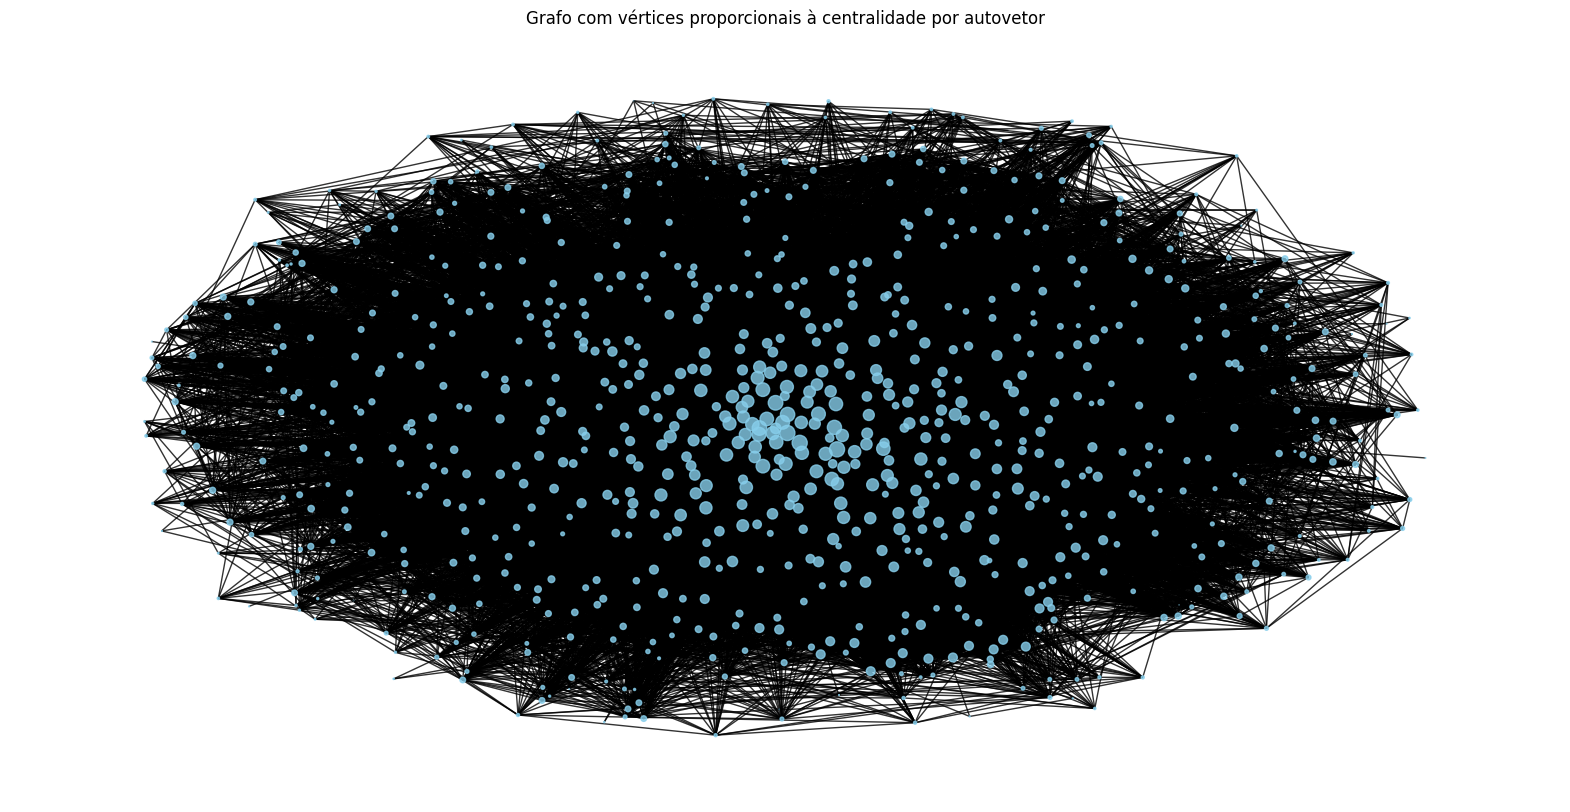

In [97]:
node_sizes_degree = [graph.nodes[node].get('centrality_vector', 0) * 1000 for node in graph.nodes()]

pos = nx.spring_layout(graph, k=1, seed=2)
plt.figure(figsize=(20, 10))
nx.draw_networkx(
    graph,
    pos,
    node_size=node_sizes_degree,
    with_labels=False,
    font_size=10,
    node_color='skyblue',
    edge_color='black',
    alpha=0.8
)
plt.title("Grafo com vértices proporcionais à centralidade por autovetor")
plt.axis('off')
plt.show()

## Salvando as informações em csv

### Informação sobre a centralidade dos nós

In [ ]:
centralidade_nos.to_csv('centralidade_artistas_grau.csv', index=False)
centralidade_vector_nos.to_csv('centralidade_artistas_vector.csv', index=False)

### Informação sobre coeficiente de agrupamento e intermediação

In [81]:
clustering_nos.to_csv('clustering.csv', index=False)
b_nos.to_csv('intermediacao.csv', index=False)